# Imports

In [2]:
import os
import warnings

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.colors as colors
import glob

SuppressWarnings = True
SuppressPlots = False

## Suppress Warnings
if SuppressWarnings:
    warnings.filterwarnings("ignore")
if SuppressPlots:
    import matplotlib
    matplotlib.use("Agg")

# Functions

In [3]:
def plot_projection(X, Y, Z, var, title):
    # Create a figure with specified size
    fig = plt.figure(figsize=(11, 6.5))

    # Set the axes using the Robinson projection
    ax = plt.axes(projection=ccrs.Robinson())

    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(vmin=-2, vmax=38)

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    # Add coastlines to the plot
    ax.coastlines()

    # Add colorbar to the plot
    cbar = plt.colorbar(cs, shrink=0.6, orientation='horizontal', label='SST (Celsius)')

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

In [4]:
var = 'TEMP'

In [5]:
new_lat=np.arange(-90,90.5,1)
new_lon=np.arange(0,360,1)

In [6]:
output_file_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'

# Model Cases

| Model CASE | Variable Name |
| --- | --- |
| CCSM4 (b40) | ds1 |
| CESM 1.2 (b.e12) | ds2 |
| CESM2(b.e21) | ds3 |
| COSMOS | ds4 |
| EC-Earth 3.3 | ds5 |
| HADGEM3 NEW 1997 | ds6  |
| IPSLCM5-LR  | ds7 |
| IPSLCM5-LR 2.1(A2) | ds8 |
| MIROC4 2004 | ds9 |
| EC-EARTH 3.1 | ds10 |
| Utrecht CESM1.0.5  | ds13 |
| IPSLCM6A_LR | ds16 |
| GISS | ds17 |
| NorESM-F | ds18 |

## #1 CCSM4 (B40) Annual Mean Pliocene Sea Surface Temperature (No Custom Mask)

In [45]:
# Setting the file path and name
path1 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname1 = 'b40.B1850.f09_g16.PMIP4-pliomip2.pop.h.TEMP.1001-1100.annavg.nc'

# Specify the desired output file path
output_file_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/CCSM4_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds1 = xr.open_dataset(path1 + fname1)

# Squeeze the dataset to remove singleton dimensions
ds1 = ds1.squeeze()

# Convert z_t variable to meters (divide by 100)
ds1['z_t'] = ds1['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds1 = ds1.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t':'lev'})

# Create a new dataset with desired lat and lon coordinates
ds1_out = xr.Dataset({'lat': (['lat'], new_lat),
                      'lon': (['lon'], new_lon)
                     })
# Create a regridder object using the source dataset (ds1) and the destination dataset (ds1_out)
regridder = xe.Regridder(ds1, ds1_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr1_out = regridder(ds1['TEMP']).to_dataset(name='TEMP')

# Save dr1_out to the output file path
dr1_out.to_netcdf(output_file_path)

Overwrite existing file: nearest_s2d_394x320_181x360.nc 
 You can set reuse_weights=True to save computing time.


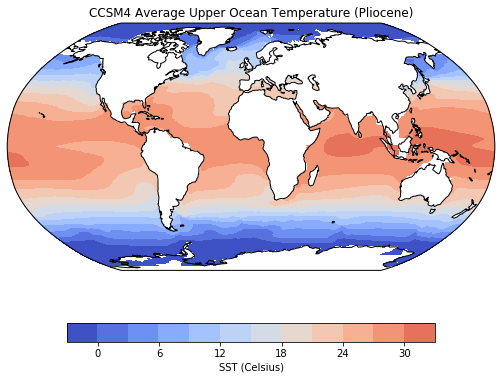

In [42]:
# Plotting
plot_projection(
    dr1_out.lon,
    dr1_out.lat,
    dr1_out['TEMP'][0, :, :],
    var=var,
    title="CCSM4 Average Upper Ocean Temperature (Pliocene)"
)

## #2 CESM 1.2 (b.e12)Annual Mean Pliocene Sea Surface Temperature (No Custom Mask)

In [48]:
# CESMModel 1.2 (b.e12)
path2 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'  
fname2 = 'b.e12.B1850.f09_g16.PMIP4-pliomip2.pop.h.TEMP.1100-1199.annavg.nc'

# Specify the desired output file path
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/CESM1.2(b.e12_Eoi400).nc'

# Open the dataset using xarray and concatenate the dimensions
ds2 = xr.open_dataset(path2 + fname2)

# Squeeze the dataset to remove singleton dimensions
ds2 = ds2.squeeze()

# Convert z_t variable to meters (divide by 100)
ds2['z_t'] = ds2['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds2 = ds2.rename({'TLONG': 'lon', 'TLAT': 'lat', 'z_t':'lev'})

# Create a new dataset with desired lat and lon coordinates
ds2_out = xr.Dataset({'lat': (['lat'], new_lat),
                      'lon': (['lon'], new_lon)
                     })
# Create a regridder object using the source dataset (ds2) and the destination dataset (ds2_out)
regridder = xe.Regridder(ds2, ds2_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr2_out = regridder(ds2['TEMP']).to_dataset(name='TEMP')

# Interpolate data to the new vertical levels
interpolated_data = dr2_out['TEMP'].interp(lev=new_levels)

# Update the dataset with the new vertical levels
dr2_out['lev'] = new_levels

# Save dr1_out to the output file path
dr2_out.to_netcdf(output_file_path)
dr2_out

Overwrite existing file: nearest_s2d_394x320_181x360.nc 
 You can set reuse_weights=True to save computing time.


PermissionError: [Errno 13] Permission denied: b'/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/CCSM4_plio.nc'

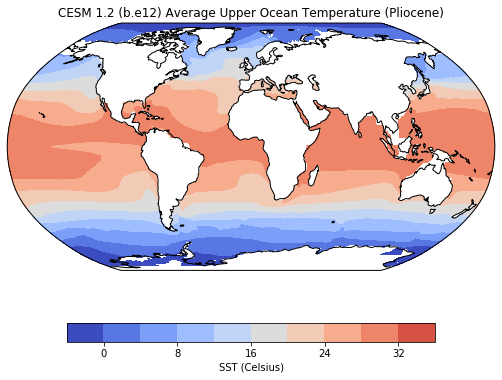

In [8]:
# Plotting
plot_projection(
    dr2_out.lon,
    dr2_out.lat,
    dr2_out['TEMP'][0, :, :],
    var=var,
    title="CESM 1.2 (b.e12) Average Upper Ocean Temperature (Pliocene)"
)

## #3 CESM2(b.e21)Annual Mean Pliocene Sea Surface Temperature (No Custom Mask)

In [18]:
# Specify the file path and name of the dataset
path3 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname3 = 'b.e21.B1850.f09_g16.PMIP4-pliomip2.pop.h.TEMP.1100-1199.annavg.nc'

# Open the dataset using xarray and squeeze the dimensions
ds3 = xr.open_dataset(path3 + fname3)
ds3 = ds3.squeeze()

# Convert z_t variable to meters (divide by 100)
ds3['z_t'] = ds3['z_t'] * (1/100)

# Rename the dimensions from TLONG and TLAT to lon and lat
ds3 = ds3.rename({'TLONG': 'lon', 'TLAT': 'lat'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds3_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds3, ds3_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr3_out = regridder(ds3['TEMP']).to_dataset(name='TEMP')

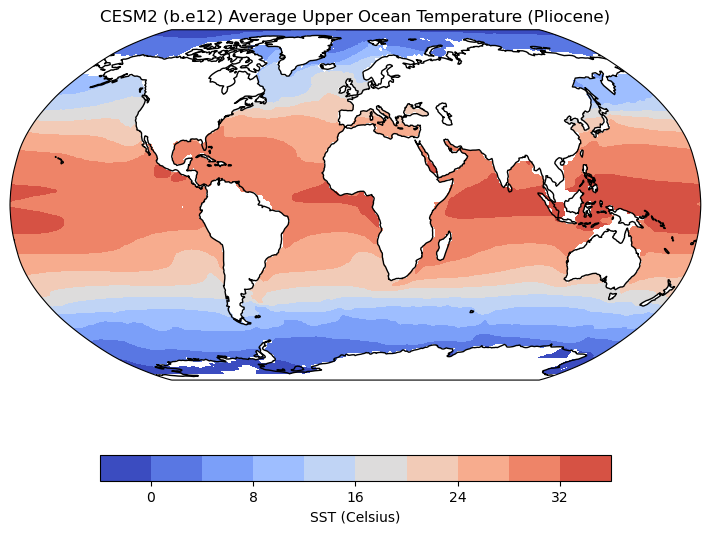

In [19]:
# Plotting
plot_projection(
    dr3_out['lon'],
    dr3_out['lat'],
    dr3_out['TEMP'][0, :, :],
    var=var,
    title="CESM2 (b.e12) Average Upper Ocean Temperature (Pliocene)")

## #4 COSMOS Annual Mean Pliocene Sea Surface Temperature

In [6]:
# Specify the file path and name of the dataset
path4 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/Eoi400/'
fname4 = 'Eoi400.THO_CMIP6_name_thetao_2650-2749_multiyear_monthly_mean_remapcon_r360x180.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds4 = xr.open_dataset(path4 + fname4, decode_times=False)

# Calculate the mean along the 'time' dimension
ds4 = ds4.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds4_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds4, ds4_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr4_out = regridder(ds4['thetao']).to_dataset(name='thetao')

# Convert the temperature values from Kelvin to Celsius
dr4_out['thetao'].values = dr4_out['thetao'].values - 273.15

# Specify the mask file path and name
mask_file4 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/land_sea_masks/Eoi400_et_al/Eoi400.slm.oce.nc'

# Open the mask dataset using xarray
ds_mask4 = xr.open_dataset(mask_file4)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask4 = ds_mask4.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds4mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask4, ds4mask_out, 'nearest_s2d')

# Perform regridding on the SLM variable and convert to dataset
dr4mask_out = regridder(ds_mask4['SLM']).to_dataset(name='SLM')

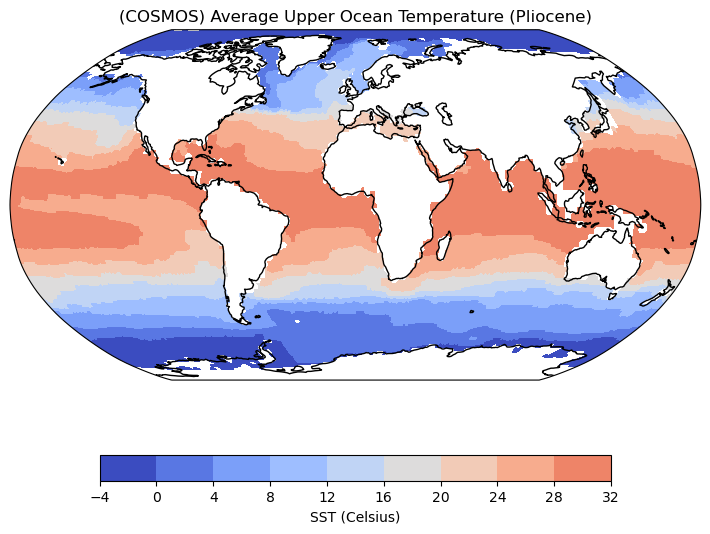

In [7]:
# Plotting
plot_projection(
    dr4mask_out.lon,
    dr4mask_out.lat,
    dr4_out['thetao'][0, :, :].where(dr4mask_out['SLM']==0),
    var=var,
    title="(COSMOS) Average Upper Ocean Temperature (Pliocene)"
)

## #5 EC-Earth 3.3 Annual Mean Pliocene Sea Surface Temperature

In [22]:
# Specify the file path and name of the dataset
path5 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/'
fname5 = 'EC-Earth3.3_mPlio_T.S.mean.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds5 = xr.open_dataset(path5 + fname5, decode_times=False)

# Rename the lon and lat dimensions
ds5 = ds5.rename({'nav_lon': 'lon', 'nav_lat': 'lat'})

# Calculate the mean along the 'time_counter' dimension
ds5 = ds5.mean('time_counter')

# Create a new dataset for regridding with desired lat and lon coordinates
ds5_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds5, ds5_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr5_out = regridder(ds5['thetao']).to_dataset(name='thetao')

# Specify the mask file path and name
mask_file5 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/EC-Earth3.3_mPlio_LSM.nc'

# Open the mask dataset using xarray
ds_mask5 = xr.open_dataset(mask_file5)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask5 = ds_mask5.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds5mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask5, ds5mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr5mask_out = regridder(ds_mask5['LSM']).to_dataset(name='LSM')

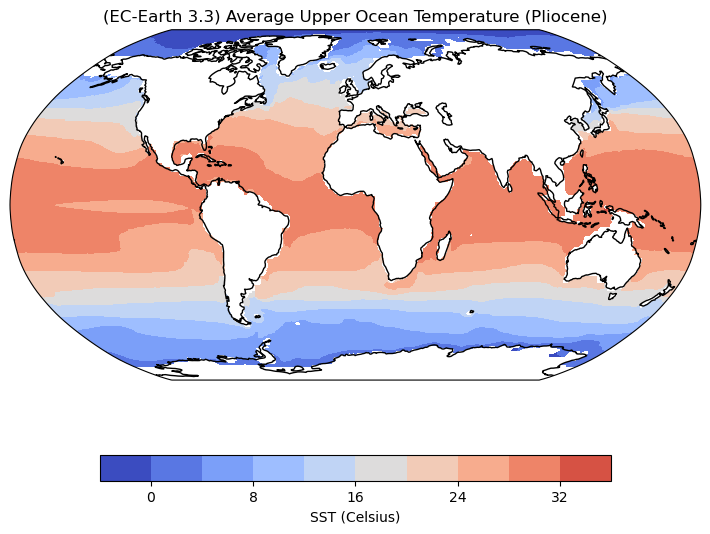

In [23]:
# Plotting
plot_projection(
    dr5mask_out.lon,
    dr5mask_out.lat,
    dr5_out['thetao'][0, :, :].where(dr5mask_out['LSM']==0),
    var=var,
    title="(EC-Earth 3.3) Average Upper Ocean Temperature (Pliocene)"
)

## #6 HADGEM3 NEW 1997 Annual Mean Pliocene Sea Surface Temperature

In [24]:
# Specify the file path and name of the dataset
path6 = '/glade/campaign/univ/ugmu0029/PlioMIP2/HadGEM3_new/climatologies/Eoi400/ocean/'
fname6 = 'clims_hadgem3_pliocene_temp_final.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds6 = xr.open_dataset(path6 + fname6, decode_times=False)

# Rename the lon and lat dimensions
ds6 = ds6.rename({'longitude': 'lon', 'latitude': 'lat'})

# Calculate the mean along the 'time' dimension
ds6 = ds6.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds6_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds6, ds6_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr6_out = regridder(ds6['temp']).to_dataset(name='temp')

# Specify the mask file path and name
mask_file6 = '/glade/campaign/univ/ugmu0029/PlioMIP2/HadGEM3_new/hadgem3.mask.nc'

# Open the mask dataset using xarray
ds_mask6 = xr.open_dataset(mask_file6, decode_times=False)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask6 = ds_mask6.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds6mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask6, ds6mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr6mask_out = regridder(ds_mask6['lsm']).to_dataset(name='lsm')

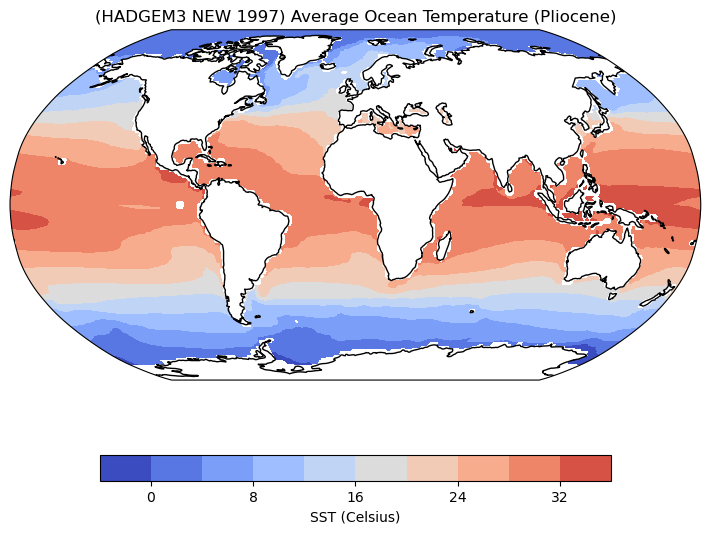

In [25]:
# Plotting
plot_projection(
    dr6mask_out.lon,
    dr6mask_out.lat,
    dr6_out['temp'][0, :, :].where(dr6mask_out['lsm']==0),
    var=var,
    title="(HADGEM3 NEW 1997) Average Ocean Temperature (Pliocene)"
)

## #7 IPSLCM5-LR Annual Mean Pliocene Upper Ocean Temperature (No masking)

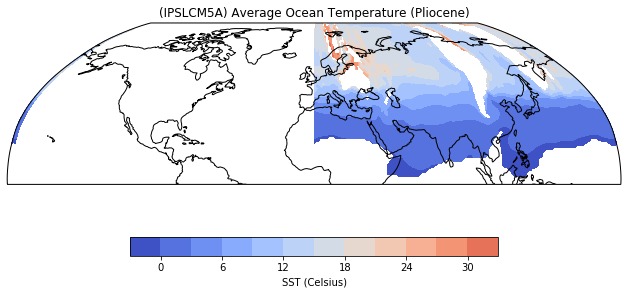

In [59]:
# Specify the file path and name of the dataset
path7 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A/'
fname7 = 'IPSLCM5A_Eoi400_oceTemp_oceSal_V.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds7 = xr.open_dataset(path7 + fname7, decode_times=False)
ds7 = ds7.mean('time_counter')
ds7 = ds7.mean('tbnds')
ds7 = ds7.mean('deptht')
# Plotting
plot_projection(
    ds7.x,
    ds7.y,
    ds7['votemper'],
    var=var,
    title="(IPSLCM5A) Average Ocean Temperature (Pliocene)"
)

In [51]:
# Specify the file path and name of the dataset
path7 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A/'
fname7 = 'IPSLCM5A_Eoi400_oceTemp_oceSal_V.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds7 = xr.open_dataset(path7 + fname7, decode_times=False)

# Calculate the mean along the 'time' dimension
ds7 = ds7.mean('time_counter')
ds7 = ds7.mean('tbnds')
ds7 = ds7.mean('deptht')
ds7 = ds7.rename({'votemper': 'temp','x': 'lon','y': 'lat'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds7_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds7, ds7_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr7_out = regridder(ds7['temp']).to_dataset(name='temp')

# Save the dataset as a NetCDF file
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/IPSLCM5A_plio.nc'  

dr7_out.to_netcdf(output_path)
print('done')

Overwrite existing file: nearest_s2d_149x182_181x360.nc 
 You can set reuse_weights=True to save computing time.
done


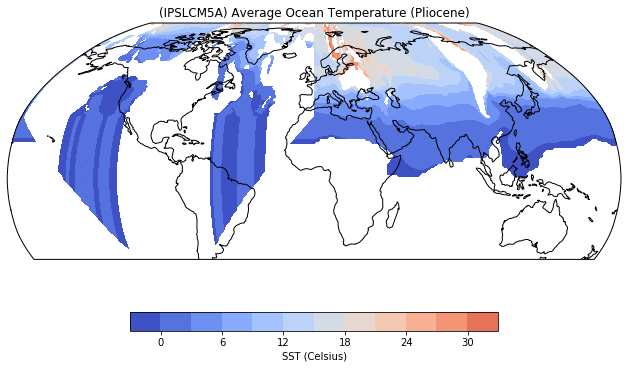

In [52]:
# Plotting
plot_projection(
    dr7_out.lon,
    dr7_out.lat,
    dr7_out['temp'],
    var=var,
    title="(IPSLCM5A) Average Ocean Temperature (Pliocene)"
)

## #8 IPSLCM5-LR 2.1 Annual Mean Pliocene Upper Ocean Temperature (No masking)

In [30]:
# Specify the file path and name of the dataset
path8 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A2/'
fname8 = 'IPSLCM5A2_Eoi400_oceTemp_oceSal_V.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds8 = xr.open_dataset(path8 + fname8, decode_times=False)

# Calculate the mean along the 'time' dimension
ds8 = ds8.mean('time_counter')
ds8 = ds8.mean('tbnds')
ds8 = ds8.mean('deptht')
ds8 = ds8.rename({'votemper': 'temp','x': 'lon','y': 'lat'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds8_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds8, ds8_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr8_out = regridder(ds8['temp']).to_dataset(name='temp')

# Save the dataset as a NetCDF file
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/IPSLCM5A_plio.nc'  

dr7_out.to_netcdf(output_path)
print('done')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, depthv: 31, nvertex: 4, tbnds: 2, time_counter: 12, x: 182, y: 149)
Coordinates:
  * deptht                (deptht) float32 4.999938 15.000288 ... 5250.2266
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
    time_centered         (time_counter) float64 ...
  * time_counter          (time_counter) float64 15.0 45.0 75.0 ... 315.0 345.0
  * depthv                (depthv) float32 4.999938 15.000288 ... 5250.2266
Dimensions without coordinates: axis_nbounds, nvertex, tbnds, x, y
Data variables:
    area                  (y, x) float32 ...
    bounds_lat            (y, x, nvertex) float32 ...
    bounds_lon            (y, x, nvertex) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    so                    (time_counter, deptht, y, x) float32 ...
    thetao                (time_counter, deptht, y, x) float32 ...
    time_centered_bounds  (time_counter,

## #9 MIROC4 2004 EOI400 Annual Mean Pliocene Upper Ocean Temperature (High Memory Usage 16GB REQ)

In [7]:
# Specify the file path and name of the dataset
path9 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/to/'
fname9 = 'MIROC4m_Eoi400_Omon_to.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds9 = xr.open_dataset(path9 + fname9, decode_times=False)

# Calculate the mean along the 'time' dimension
ds9 = ds9.mean('time')
ds9 = ds9.rename({'to': 'temp'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds9_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds9, ds9_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr9_out = regridder(ds9['temp']).to_dataset(name='temp')

# Specify the mask file path and name
mask_file9 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/sftlf_ts/MIROC4m_Eoixxx_fx_sftlf_ts.nc'

# Open the mask dataset using xarray
ds_mask9 = xr.open_dataset(mask_file9, decode_times=False)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask9 = ds_mask9.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds9mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask9, ds9mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr9mask_out = regridder(ds_mask9['sftlf']).to_dataset(name='sftlf')

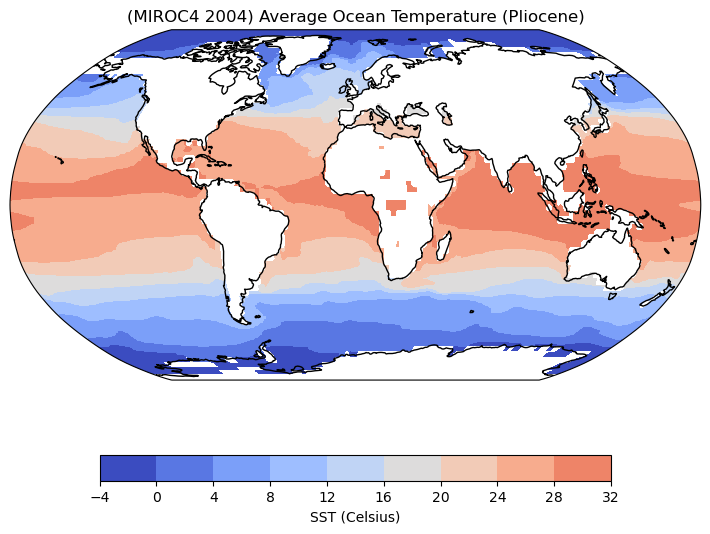

In [8]:
# Plotting
plot_projection(
    dr9mask_out.lon,
    dr9mask_out.lat,
    dr9_out['temp'][0, :, :].where(dr9mask_out['sftlf']==0),
    var=var,
    title="(MIROC4 2004) Average Ocean Temperature (Pliocene)"
)

## #10 EC-Earth 3.1 Annual Mean Pliocene Upper Ocean Temperature (Not the right files)

In [10]:
# Specify the file path and name of the dataset
path10 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.1/'
fname10 = 'mPlio.EC-Earth3.1.ocn.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds10 = xr.open_dataset(path10 + fname10, decode_times=False)

ds10

<xarray.Dataset>
Dimensions:            (bnds: 2, time_counter: 1, x: 362, x_2: 1, y: 292)
Coordinates:
  * time_counter       (time_counter) float32 14200615000.0
    nav_lon            (y, x) float32 ...
    nav_lat            (y, x) float32 ...
Dimensions without coordinates: bnds, x, x_2, y
Data variables:
    time_counter_bnds  (time_counter, bnds) float64 ...
    nav_lon_2          (y, x) float32 ...
    nav_lat_2          (y, x) float32 ...
    sobarstf           (time_counter, y, x) float32 ...
    sosaline           (time_counter, y, x) float32 ...
    nav_lon_3          (y, x_2) float32 ...
    nav_lat_3          (y, x_2) float32 ...
    zomht_glo          (time_counter, y, x_2) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    history:           Thu Aug 08 16:43:21 2019: cdo merge psi.nc so.nc mhst....
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CA

In [26]:
# Create a new dataset for regridding with desired lat and lon coordinates
ds10_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds10, ds10_out, 'nearest_s2d')


# Perform regridding on the temp variable and convert to dataset
dr10_out = regridder(ds10['sobarstf']).to_dataset(name='sobarstf')
dr10_out

<xarray.Dataset>
Dimensions:       (lat: 181, lon: 360)
Coordinates:
    time_counter  float32 1.42e+10
  * lat           (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon           (lon) int64 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
Data variables:
    sobarstf      (lat, lon) float32 1.515e+08 1.515e+08 ... -5.785e+06

In [ ]:
# Plotting
plot_projection(
    dr10_out.lon,
    dr10_out.lat,
    dr10_out['temp'][:, :],
    var=var,
    title="(EC-Earth 3.1) Average Ocean Temperature (Pliocene)"
)

## #11 NorESM-L Annual Mean Pliocene Upper Ocean Temperature (Data Not Available)

## #12 UoFT CCSM4 E28 CMIP6 Annual Mean Pliocene Upper Ocean Temperature

In [9]:
# Specify the file path and name of the dataset
path12 = '/glade/campaign/univ/ugmu0029/PlioMIP2/UofT/UofT-CCSM4/Eoi400/Omon/'
fname12 = 'zos_Omon_UofT-CCSM4_midPliocene-eoi400_r1i1p1f1_gr1_160101-170012.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds12 = xr.open_dataset(path12 + fname12, decode_times=False)
ds12

<xarray.Dataset>
Dimensions:    (bnds: 2, nlat: 180, nlon: 360, time: 1200)
Coordinates:
  * time       (time) float64 15.5 45.0 74.5 ... 3.642e+04 3.645e+04 3.648e+04
    lat        (nlat, nlon) float64 ...
    lon        (nlat, nlon) float64 ...
Dimensions without coordinates: bnds, nlat, nlon
Data variables:
    time_bnds  (time, bnds) float64 ...
    zos        (time, nlat, nlon) float32 ...
Attributes:
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           PMIP
    cesm_casename:         PlioMIP_Eoi400_pop1
    contact:               dchandan@atmosp.physics.utoronto.ca
    creation_date:         Tue Oct  1 22:05:17 2019
    data_specs_version:    01.00.31
    experiment:            mid-Pliocene
    experiment_id:         midPliocene-eoi400
    external_variables:    areacello
    forcing_index:         1
    frequency:             mon
    further_info_url:      
    grid:                  ocean data regridded from native gx1v6 displaced p...
    grid_label:         

## #13 Utrecht CESM1.0.5 Annual Mean Pliocene Upper Ocean Temperature (High Memory Usage 32 GB REC + Longer Run Time)

In [10]:
# Specify the file path and name of the dataset
path13 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/Eoi400/'
fname13 = 'thetao_Omon_CESM1.0.5_Eoi400_r1i1p1f1_gn_190001-200012.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds13 = xr.open_dataset(path13 + fname13, decode_times=False)

# Rename the 'y' and 'x' dimensions to 'lat' and 'lon', and 'thetao' to 'temp'
ds13 = ds13.rename({'y': 'lat', 'x': 'lon', 'thetao': 'temp'})

# Squeeze the dimensions to remove any size-1 dimensions
ds13 = ds13.squeeze()

# Take the mean along the 'time' dimension
ds13 = ds13.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds13_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds13, ds13_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr13_out = regridder(ds13['temp']).to_dataset(name='temp')

# Specify the mask file path and name
mask_file13 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/Eoi400/land_sea_mask_Omon_CESM1.0.5_b.PLIO_5Ma_Eoi400_f19g16_NESSC_control_r1i1p1f1_gn.nc'

# Open the mask dataset using xarray, with decode_times=False to avoid decoding times
ds_mask13 = xr.open_dataset(mask_file13, decode_times=False)

# Rename the dimensions and variables in the mask dataset
ds_mask13 = ds_mask13.rename({'NLON': 'lon', 'NLAT': 'lat', 'LAND_SEA_MASK_OMON': 'lsm'})

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds13mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask13, ds13mask_out, 'nearest_s2d')

# Perform regridding on the lsm variable and convert to dataset
dr13mask_out = regridder(ds_mask13['lsm']).to_dataset(name='lsm')

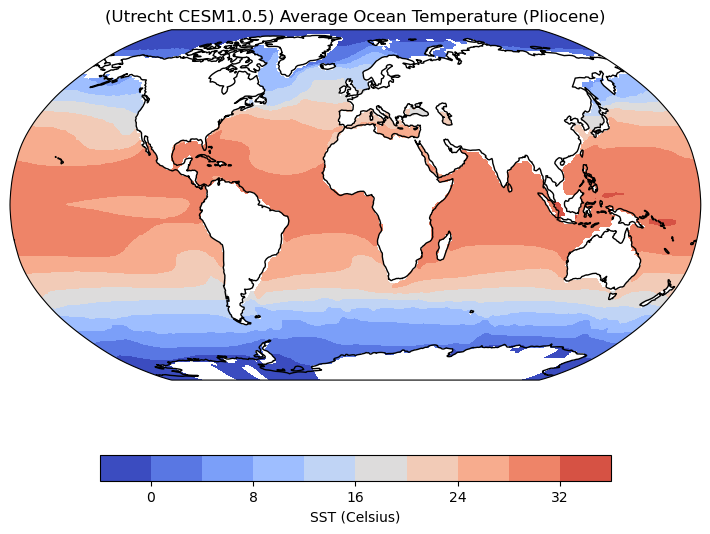

In [11]:
# Plotting
plot_projection(
    dr13mask_out.lon,
    dr13mask_out.lat,
    dr13_out['temp'][0, :, :],
    var=var,
    title="(Utrecht CESM1.0.5) Average Ocean Temperature (Pliocene)"
)

## #14 Leeds Annual Mean Pliocene Upper Ocean Temperature

In [80]:
# Define the wildcard pattern for file matching
wildcard_pattern = 'eoi400.thetao.0**.nc'

# Specify the directory where your data files are located
data_directory = '/glade/campaign/univ/ugmu0029/PlioMIP2/LEEDS/HadCM3/eoi400/thetao/'

# Use glob to get a list of matching file paths
file_paths = glob.glob(data_directory + wildcard_pattern)

# Initialize an empty list to store individual datasets
datasets = []

# Load individual data files and store them in the 'datasets' list
for file_path in file_paths:
    ds = xr.open_dataset(file_path)
    datasets.append(ds)

# Concatenate along the time dimension
if datasets:
    combined_data = xr.concat(datasets, dim='time')

    # Save the concatenated data as a new NetCDF file
    combined_data.to_netcdf('LEEDS_thetao.nc')
    
    # Specify the desired output file path
    output_file_path = '/glade/u/home/nwrye/OceanTemps_Compiles/'

    # Save the concatenated data as a new NetCDF file with the specified output file path
    combined_data.to_netcdf(output_file_path)

    # Optionally, close the datasets to release resources
    for ds in datasets:
        ds.close()
        
else:
    print("No matching files found.")

PermissionError: [Errno 13] Permission denied: b'/glade/u/home/nwrye/OceanTemps_Compiles'

In [84]:
# Specify the file path and name of the dataset
path14 = '/glade/u/home/nwrye/OceanTemps_Compiles/'
fname14 = 'LEEDS_thetao.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds14 = xr.open_dataset(path14 + fname14)

# Squeeze the dimensions to remove any size-1 dimensions
ds14 = ds14.squeeze()

# Calculate the mean along the 'time' dimension
ds14 = ds14.mean('time')
ds14 = ds14.mean('t')

# Rename the 'thetao' variable to 'temp'
ds14 = ds14.rename({'temp_1': 'temp','latitude': 'lat','longitude': 'lon'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds14_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds14, ds14_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr14_out = regridder(ds14['temp']).to_dataset(name='temp')

# Save the dataset as a NetCDF file
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/LEEDS_plio.nc'  

dr14_out.to_netcdf(output_path)
print('done')

Overwrite existing file: nearest_s2d_144x288_181x360.nc 
 You can set reuse_weights=True to save computing time.
done


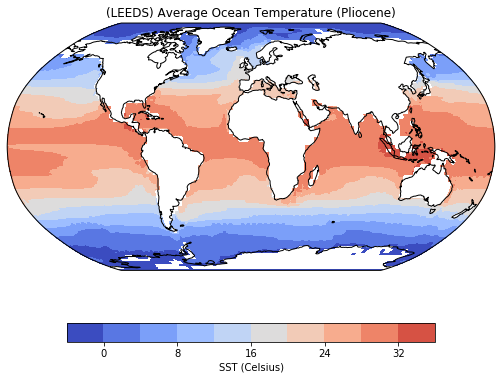

In [83]:
# Plotting
plot_projection(
    dr14_out.lon,
    dr14_out.lat,
    dr14_out['temp'][0, :, :],
    var=var,
    title="(LEEDS) Average Ocean Temperature (Pliocene)"
)

## #15 MRI-CGCM2.3 Annual Mean Pliocene Upper Ocean Temperature (Data not Available)

## #16 IPSLCM6A_LR Annual Mean Pliocene Upper Ocean Temperature (64 GB Rec)

In [48]:
# Specify the file path and name of the dataset
path16 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM6A/thetao/'
fname16 = 'thetao_Omon_IPSL-CM6A-LR_midPliocene-eoi400_r1i1p1f1_gn_195001-204912.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds16 = xr.open_dataset(path16 + fname16)

# Squeeze the dimensions to remove any size-1 dimensions
ds16 = ds16.squeeze()

# Calculate the mean along the 'time' dimension
ds16 = ds16.mean('time')

# Rename the 'thetao' variable to 'temp'
ds16 = ds16.rename({'thetao': 'temp','y': 'lat','x': 'lon'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds16_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds16, ds16_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr16_out = regridder(ds16['temp']).to_dataset(name='temp')

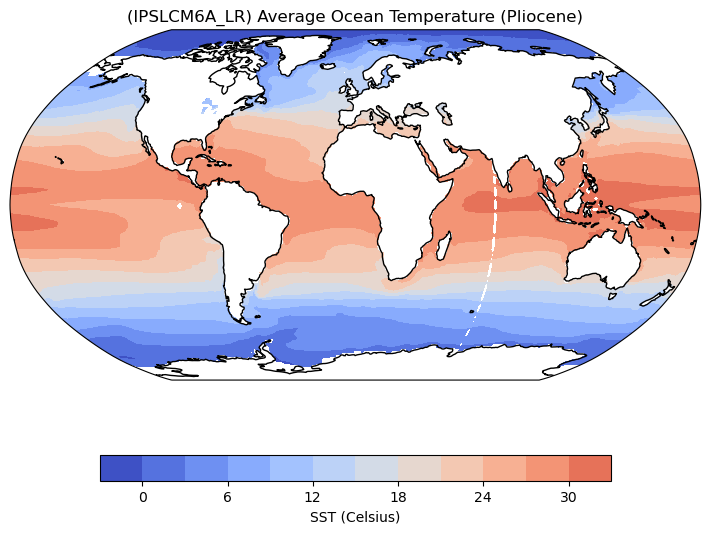

In [49]:
# Plotting
plot_projection(
    dr16_out.lon,
    dr16_out.lat,
    dr16_out['temp'][0, :, :],
    var=var,
    title="(IPSLCM6A_LR) Average Ocean Temperature (Pliocene)"
)

## #17 GISS Annual Mean Pliocene Upper Ocean Temperature (No Custom Mask)

In [19]:
# Specify the file path and name of the dataset
path17 = '/glade/campaign/univ/ugmu0029/PlioMIP2/GISS/thetao/thetaoPlio/'
fname17 = 'thetao_Omon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_305101-307012.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds17 = xr.open_dataset(path17 + fname17)

# Calculate the mean along the 'time' dimension
ds17 = ds17.mean('time')

# Rename the 'thetao' variable to 'temp'
ds17 = ds17.rename({'thetao': 'temp'})

# Squeeze the dimensions to remove any size-1 dimensions
ds17 = ds17.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds17_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds17, ds17_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr17_out = regridder(ds17['temp']).to_dataset(name='temp')

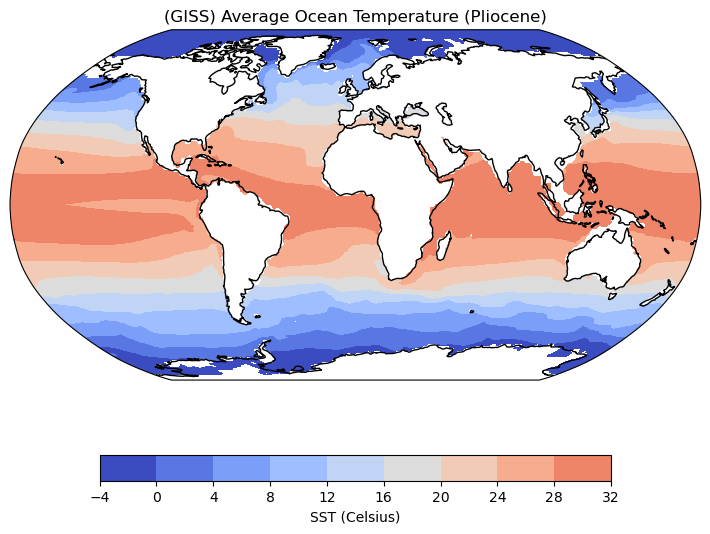

In [27]:
# Plotting
plot_projection(
    dr17_out.lon,
    dr17_out.lat,
    dr17_out['temp'][0, :, :],
    var=var,
    title="(GISS) Average Ocean Temperature (Pliocene)"
)

## #18 NorESM-F Annual Mean Pliocene Upper Ocean Temperature (No files)

In [15]:
# Specify the file path and name of the dataset
path18 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NorESM1-F/'
fname18 = 'Eoi400_NorESM1-F_thetao.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds18 = xr.open_dataset(path18 + fname18, decode_times=False)
ds18

ds18 = ds18.rename({'thetao': 'TEMP', 'depth':'lev'})
ds18 = ds18.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds18_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds18, ds18_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr18_out = regridder(ds18['TEMP']).to_dataset(name='TEMP')

file = 'NorESM-F_plio.nc'

# Save dr1_out to the output file path
dr18_out.to_netcdf(output_file_path + file)

Overwrite existing file: nearest_s2d_180x360_181x360.nc 
 You can set reuse_weights=True to save computing time.


## Model CONTROL CASES VARIABLE LIST

| Model CONTROL CASE | Variable Name |
| --- | --- |
| CCSM4 (b40) | ds18 |
| CESM 1.2 (b.e12) | ds19 |
| CESM2(b.e21) | ds20 |
| COSMOS | ds21 |
| EC-Earth 3.3 | ds22 |
| HADGEM3 NEW 1997 | ds23  |
| IPSLCM5-LR  | ds24 |
| IPSLCM5-LR 2.1(A2) | ds25 |
| MIROC4 2004 | ds26 |
| EC-EARTH 3.1 | ds27 |
| NorESM-L | ds28 |
| UoFT CCSM4 E28 CMIP6 | ds29 |
| Utrecht CESM1.0.5  | ds30 |
| LEEDS HADCM3  | ds31 |
| MRI-CGCM2.3 | ds32 |
| IPSLCM6A_LR | ds33 |
| GISS | ds34 |

## #18 CCSM4 (B40) Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Mask)

In [28]:
# Specify the file path and name of the dataset
path18 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname18 = 'b40.B1850.f09_g16.preind.pop.h.TEMP.0081-0180.annavg.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds18 = xr.open_dataset(path18 + fname18, decode_times=False)

# Squeeze the dataset to remove singleton dimensions
ds18 = ds18.squeeze()

# Convert z_t variable to meters (divide by 100)
ds18['z_t'] = ds18['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds18 = ds18.rename({'TLONG': 'lon', 'TLAT': 'lat'})

# Create a new dataset with desired lat and lon coordinates
ds18_out = xr.Dataset({'lat': (['lat'], new_lat),
                      'lon': (['lon'], new_lon)
                     })

# Create a regridder object using the source dataset (ds2) and the destination dataset (ds2_out)
regridder = xe.Regridder(ds18, ds18_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr18_out = regridder(ds18['TEMP']).to_dataset(name='TEMP')

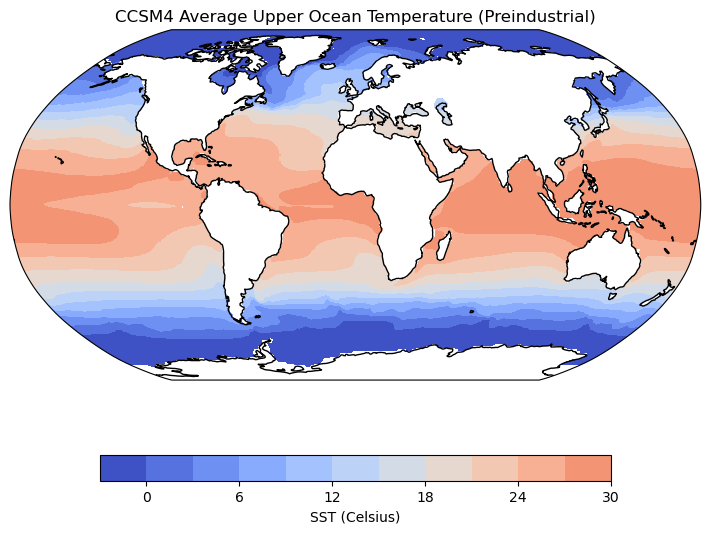

In [29]:
# Plotting
plot_projection(dr18_out.lon,
                dr18_out.lat,
                dr18_out['TEMP'][0, :, :],
                var=var,
                title="CCSM4 Average Upper Ocean Temperature (Preindustrial)")

## #19 CESM 1.2 (b.e12)Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Mask)

In [30]:
# Specify the file path and name of the dataset
path19 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname19 = 'b.e12.B1850.f09_g16.preind.pop.h.TEMP.0707-0806.annavg.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds19 = xr.open_dataset(path19 + fname19, decode_times=False)

# Squeeze the dataset to remove singleton dimensions
ds19 = ds19.squeeze()

# Convert z_t variable to meters (divide by 100)
ds19['z_t'] = ds19['z_t'] * (1/100)

# Rename variables TLONG and TLAT to lon and lat, respectively
ds19 = ds19.rename({'TLONG': 'lon', 'TLAT': 'lat'})

# Create a new dataset with desired lat and lon coordinates
ds19_out = xr.Dataset({'lat': (['lat'], new_lat),
                      'lon': (['lon'], new_lon)
                     })

# Create a regridder object using the source dataset (ds2) and the destination dataset (ds2_out)
regridder = xe.Regridder(ds19, ds19_out, 'nearest_s2d')

# Regrid the 'TEMP' variable using the regridder and convert it to a dataset
dr19_out = regridder(ds19['TEMP']).to_dataset(name='TEMP')

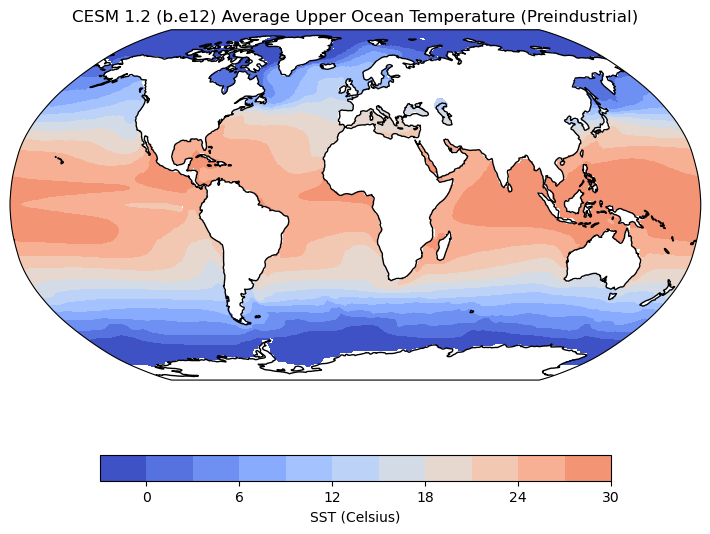

In [31]:
# Plotting
plot_projection(dr19_out.lon,
                dr19_out.lat,
                dr19_out['TEMP'][0, :, :],
                var=var,
                title="CESM 1.2 (b.e12) Average Upper Ocean Temperature (Preindustrial)")

## #20 CESM2 (b.e21)Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Mask)

In [32]:
# Specify the file path and name of the dataset
path20 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NCAR/'
fname20 = 'b.e21.B1850.f09_g16.preind.pop.h.TEMP.1100-1200.annavg.nc'

# Open the dataset using xarray and squeeze the dimensions
ds20 = xr.open_dataset(path20 + fname20)
ds20 = ds20.squeeze()

# Rename the dimensions from TLONG and TLAT to lon and lat
ds20 = ds20.rename({'TLONG': 'lon', 'TLAT': 'lat'})

# Convert z_t variable to meters (divide by 100)
ds20['z_t'] = ds20['z_t'] * (1/100)

# Create a new dataset for regridding with desired lat and lon coordinates
ds20_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds20, ds20_out, 'nearest_s2d')

# Perform regridding on the TEMP variable and convert to dataset
dr20_out = regridder(ds20['TEMP']).to_dataset(name='TEMP')

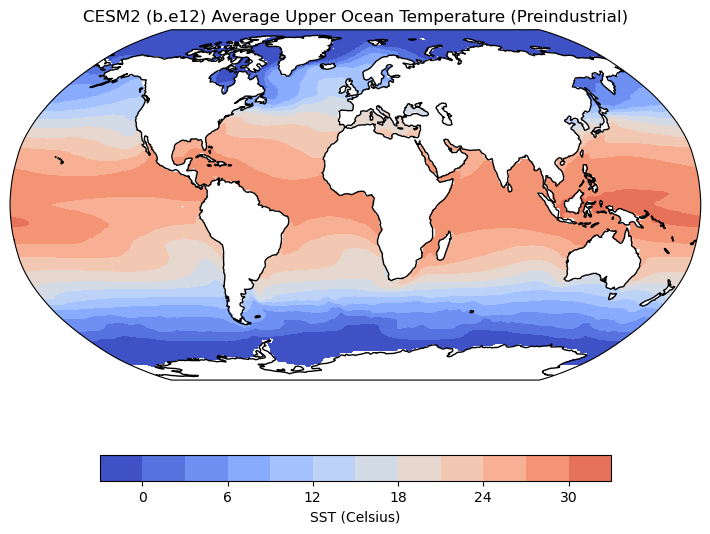

In [33]:
# Plotting
plot_projection(
    dr20_out['lon'],
    dr20_out['lat'],
    dr20_out['TEMP'][0, :, :],
    var=var,
    title="CESM2 (b.e12) Average Upper Ocean Temperature (Preindustrial)"
)

## #21 COSMOS Annual Mean Preindustrial Control Upper Ocean Temperature

In [34]:
# Specify the file path and name of the dataset
path21 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/E280/'
fname21 = 'E280.THO_CMIP6_name_thetao_2650-2749_multiyear_monthly_mean_remapcon_r360x180.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds21 = xr.open_dataset(path21 + fname21, decode_times=False)

# Calculate the mean along the 'time' dimension
ds21 = ds21.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds21_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds21, ds21_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr21_out = regridder(ds21['thetao']).to_dataset(name='thetao')

# Convert the temperature values from Kelvin to Celsius
dr21_out['thetao'].values = dr21_out['thetao'].values - 273.15

# Specify the mask file path and name
mask_file21 = '/glade/campaign/univ/ugmu0029/PlioMIP2/AWI/COSMOS/land_sea_masks/E280_et_al/E280.slm.oce.nc'

# Open the mask dataset using xarray
ds_mask21 = xr.open_dataset(mask_file21)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask21 = ds_mask21.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds21mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask21, ds21mask_out, 'nearest_s2d')

# Perform regridding on the SLM variable and convert to dataset
dr21mask_out = regridder(ds_mask21['SLM']).to_dataset(name='SLM')

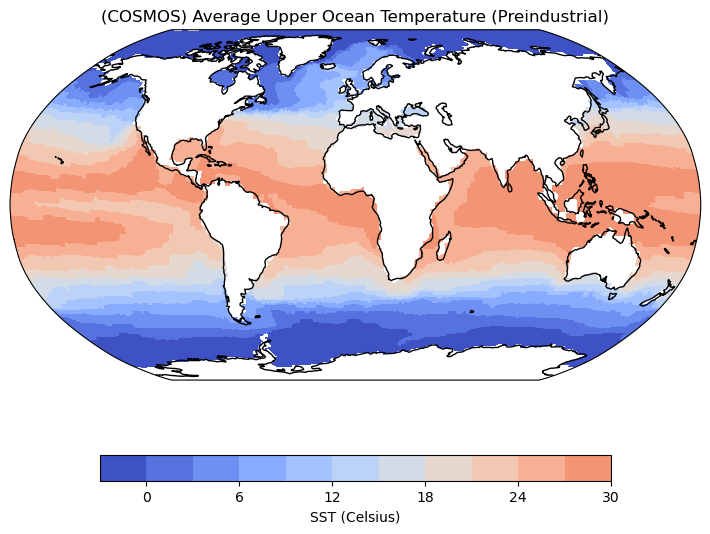

In [35]:
# Plotting
plot_projection(
    dr21mask_out.lon,
    dr21mask_out.lat,
    dr21_out['thetao'][0, :, :].where(dr21mask_out['SLM']==0),
    var=var,
    title="(COSMOS) Average Upper Ocean Temperature (Preindustrial)"
)

## #22 Earth 3.3 Annual Mean Preindustrial Control Upper Ocean Temperature

In [36]:
# Specify the file path and name of the dataset
path22 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/'
fname22 = 'EC-Earth3.3_PI_T.S.mean.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds22 = xr.open_dataset(path22 + fname22, decode_times=False)

# Rename the lon and lat dimensions
ds22 = ds22.rename({'nav_lon': 'lon', 'nav_lat': 'lat'})

# Calculate the mean along the 'time_counter' dimension
ds22 = ds22.mean('time_counter')

# Create a new dataset for regridding with desired lat and lon coordinates
ds22_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds22, ds22_out, 'nearest_s2d')

# Perform regridding on the thetao variable and convert to dataset
dr22_out = regridder(ds22['thetao']).to_dataset(name='thetao')

# Specify the mask file path and name
mask_file22 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.3/EC-Earth3.3_mPlio_LSM.nc'

# Open the mask dataset using xarray
ds_mask22 = xr.open_dataset(mask_file22)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask22 = ds_mask22.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds22mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask22, ds22mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr22mask_out = regridder(ds_mask22['LSM']).to_dataset(name='LSM')

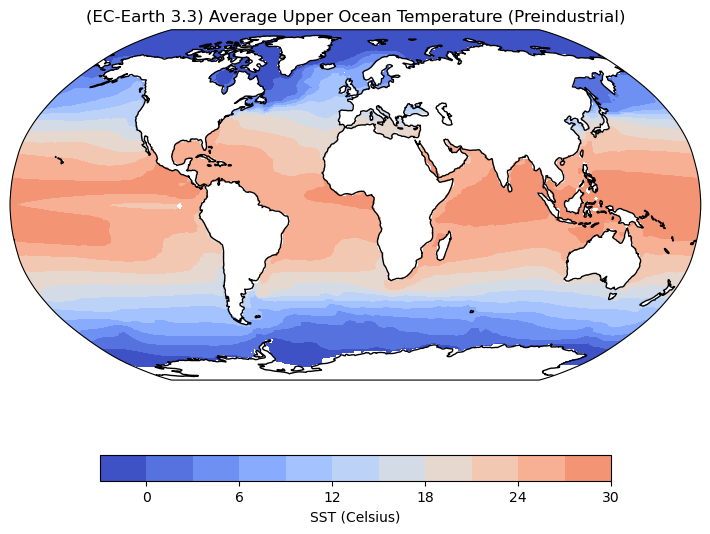

In [37]:
# Plotting
plot_projection(
    dr22mask_out.lon,
    dr22mask_out.lat,
    dr22_out['thetao'][0, :, :],
    var=var,
    title="(EC-Earth 3.3) Average Upper Ocean Temperature (Preindustrial)"
)

## #23 HADGEM3 NEW 1997 Annual Mean Preindustrial Control Upper Ocean Temperature

In [38]:
# Specify the file path and name of the dataset
path23 = '/glade/campaign/univ/ugmu0029/PlioMIP2/HadGEM3_new/climatologies/E280/ocean/'
fname23 = 'clims_hadgem3_pi_temp.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds23 = xr.open_dataset(path23 + fname23)

# Rename the lon and lat dimensions
ds23 = ds23.rename({'longitude': 'lon', 'latitude': 'lat'})

# Calculate the mean along the 'time' dimension
ds23 = ds23.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds23_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds23, ds23_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr23_out = regridder(ds23['temp']).to_dataset(name='temp')

# Specify the mask file path and name
mask_file23 = '/glade/campaign/univ/ugmu0029/PlioMIP2/HadGEM3_new/hadgem3.mask.nc'

# Open the mask dataset using xarray
ds_mask23 = xr.open_dataset(mask_file23)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask23 = ds_mask23.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds23mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask23, ds23mask_out, 'nearest_s2d')

# Perform regridding on the LSM variable and convert to dataset
dr23mask_out = regridder(ds_mask23['LSM']).to_dataset(name='LSM')

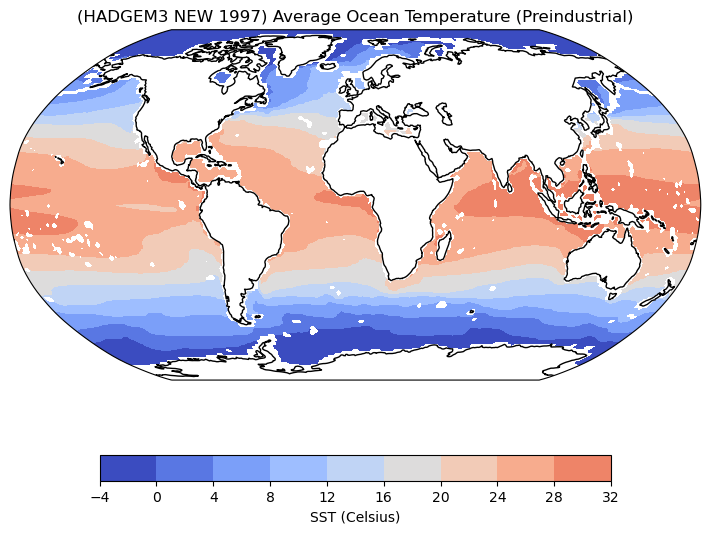

In [39]:
# Plotting
plot_projection(
    dr23_out.lon,
    dr23_out.lat,
    dr23_out['temp'][0, :, :].where(dr23mask_out['LSM']==0),
    var=var,
    title="(HADGEM3 NEW 1997) Average Ocean Temperature (Preindustrial)"
)

## #24 IPSLCM5-LR Annual Mean Preindustrial Control Upper Ocean Temperature (No masking)

In [9]:
# Specify the file path and name of the dataset
path24 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A/'
fname24 = 'PI.SeasurfaceTemp_sst_3600_3699_monthly_TS.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds24 = xr.open_dataset(path24 + fname24, decode_times=False)

# Calculate the mean along the 'time' dimension
ds24 = ds24.mean('time_counter')
ds24 = ds24.rename({'sst': 'temp','x': 'lon','y': 'lat'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds24_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds24, ds24_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr24_out = regridder(ds24['temp']).to_dataset(name='temp')
# Save the dataset as a NetCDF file
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/IPSLCM5A_pi.nc'  

dr24_out.to_netcdf(output_path)
print('done')

Overwrite existing file: nearest_s2d_149x182_181x360.nc 
 You can set reuse_weights=True to save computing time.
done


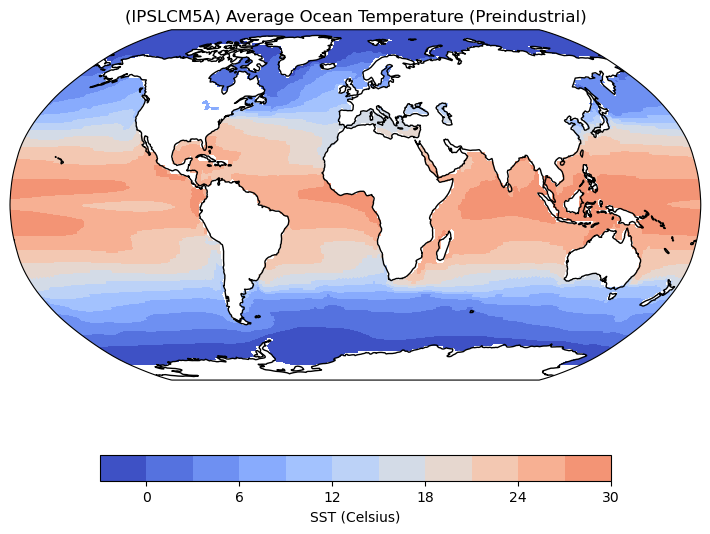

In [23]:
# Plotting
plot_projection(
    dr24_out.lon,
    dr24_out.lat,
    dr24_out['temp'],
    var=var,
    title="(IPSLCM5A) Average Ocean Temperature (Preindustrial)"
)

## #25 IPSLCM5A2 Annual Mean Preindustrial Control Upper Ocean Temperature (No masking)

In [25]:
# Specify the file path and name of the dataset
path25 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM5A2/'
fname25 = 'PI.SeasurfaceTemp_sst_6110_6209_monthly_TS.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds25 = xr.open_dataset(path25 + fname25)
# Calculate the mean along the 'time' dimension
ds25 = ds25.mean('time_counter')
ds25 = ds25.mean('nvertex')
ds25 = ds25.rename({'sst': 'temp','x': 'lon','y': 'lat'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds25_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds25, ds25_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr25_out = regridder(ds25['temp']).to_dataset(name='temp')
dr25_out

Overwrite existing file: nearest_s2d_149x182_181x360.nc 
 You can set reuse_weights=True to save computing time.


<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    temp     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [ ]:
# Save the dataset as a NetCDF file
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/IPSLCM5A2_pi.nc'  

dr25_out.to_netcdf(output_path)
print('done')

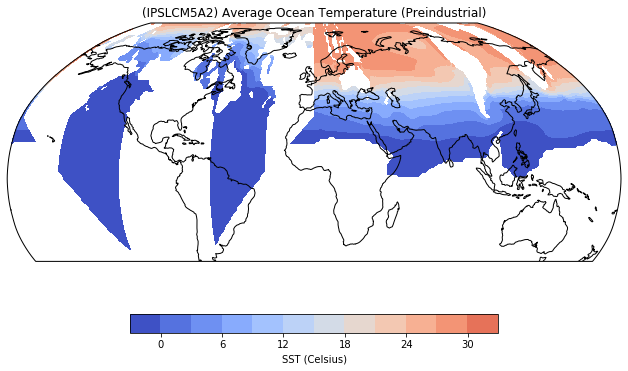

In [20]:
# Plotting
plot_projection(
    dr25_out.lon,
    dr25_out.lat,
    dr25_out['temp'],
    var=var,
    title="(IPSLCM5A2) Average Ocean Temperature (Preindustrial)"
)

## #26 MIROC 2004 Annual Mean Preindustrial Control Upper Ocean Temperature (High Memory Usage 16GB REC)

In [40]:
# Specify the file path and name of the dataset
path26 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/to/'
fname26 = 'MIROC4m_E280_Omon_to.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds26 = xr.open_dataset(path26 + fname26, decode_times=False)

# Calculate the mean along the 'time' dimension
ds26 = ds26.mean('time')
ds26 = ds26.rename({'to': 'temp'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds26_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds26, ds26_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr26_out = regridder(ds26['temp']).to_dataset(name='temp')

# Specify the mask file path and name
mask_file26 = '/glade/campaign/univ/ugmu0029/PlioMIP2/MIROC4m/sftlf_ts/MIROC4m_Exxx_fx_sftlf_ts.nc'

# Open the mask dataset using xarray
ds_mask26 = xr.open_dataset(mask_file26)

# Squeeze the dimensions to remove any size-1 dimensions
ds_mask26 = ds_mask26.squeeze()

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds26mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask26, ds26mask_out, 'nearest_s2d')

# Perform regridding on the sftlf variable and convert to dataset
dr26mask_out = regridder(ds_mask26['sftlf']).to_dataset(name='sftlf')

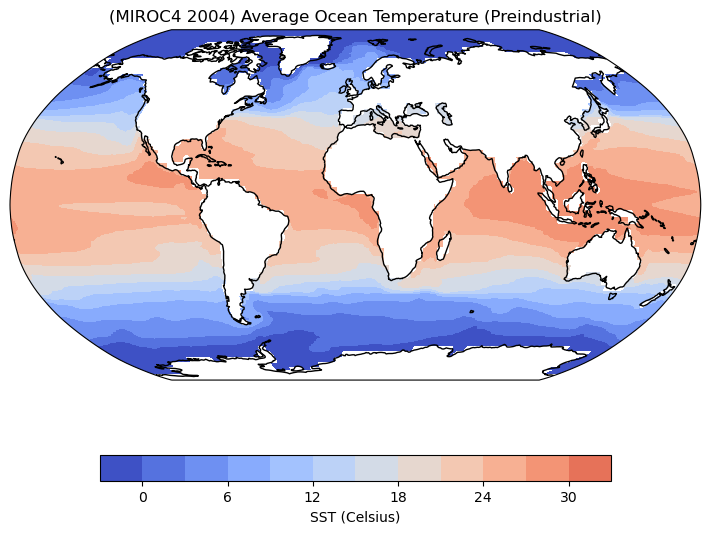

In [41]:
# Plotting
plot_projection(
    dr26_out.lon,
    dr26_out.lat,
    dr26_out['temp'][0, :, :].where(dr26mask_out['sftlf'] == 0),
    var=var,
    title="(MIROC4 2004) Average Ocean Temperature (Preindustrial)"
)

## #27 EC-Earth 3.1 Annual Mean Preindustrial Control Upper Ocean Temperature

In [52]:
# Specify the file path and name of the dataset
path27 = '/glade/campaign/univ/ugmu0029/PlioMIP2/EC-Earth3.1/'
fname27 = 'no files'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds27 = xr.open_dataset(path27 + fname27, decode_times=False)
ds27

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'cfradial1', 'furuno', 'gamic', 'gini', 'iris', 'odim', 'pydap', 'rainbow', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

## #28 UoFT CCSM4 E28 CMIP6 Annual Mean Preindustrial Control Upper Ocean Temperature (Not Inlcuded in Study)

## #29 Utrecht CESM 1.0.5 Annual Mean Preindustrial Control Upper Ocean Temperature (High Memory Usage 32 GB REC + Long RT)

In [43]:
# Specify the file path and name of the dataset
path29 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/E280/'
fname29 = 'thetao_Omon_CESM1.0.5_E280_r1i1p1f1_gn_275001-285012.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds29 = xr.open_dataset(path29 + fname29, decode_times=False)

# Rename the 'y' and 'x' dimensions to 'lat' and 'lon', and 'thetao' to 'temp'
ds29 = ds29.rename({'y': 'lat', 'x': 'lon', 'thetao': 'temp'})

# Squeeze the dimensions to remove any size-1 dimensions
ds29 = ds29.squeeze()

# Take the mean along the 'time' dimension
ds29 = ds29.mean('time')

# Create a new dataset for regridding with desired lat and lon coordinates
ds29_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds29, ds29_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr29_out = regridder(ds29['temp']).to_dataset(name='temp')

# Specify the mask file path and name
mask_file29 = '/glade/campaign/univ/ugmu0029/PlioMIP2/Utrecht/CESM1.0.5/E280/land_sea_mask_Omon_CESM1.0.5_b.PI_1pic_f19g16_NESSC_control_r1i1p1f1_gn.nc'

# Open the mask dataset using xarray, with decode_times=False to avoid decoding times
ds_mask29 = xr.open_dataset(mask_file29, decode_times=False)

# Rename the dimensions and variables in the mask dataset
ds_mask29 = ds_mask29.rename({'NLON': 'lon', 'NLAT': 'lat', 'LAND_SEA_MASK_OMON': 'lsm'})

# Create a new dataset for regridding the mask with desired lat and lon coordinates
ds29mask_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder for the mask using nearest_s2d method
regridder = xe.Regridder(ds_mask29, ds29mask_out, 'nearest_s2d')

# Perform regridding on the lsm variable and convert to dataset
dr29mask_out = regridder(ds_mask29['lsm']).to_dataset(name='lsm')

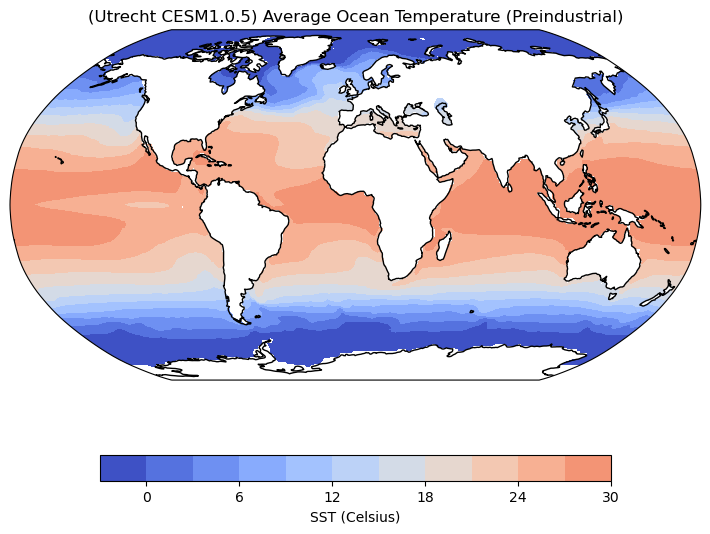

In [44]:
# Plotting
plot_projection(
    dr29mask_out.lon,
    dr29mask_out.lat,
    dr29_out['temp'][0, :, :],
    var=var,
    title="(Utrecht CESM1.0.5) Average Ocean Temperature (Preindustrial)"
)

## #30 LEEDS Annual Mean Preindustrial Control Upper Ocean Temperature

In [80]:
# Define the wildcard pattern for file matching
wildcard_pattern = 'e280.thetao.0**.nc'

# Specify the directory where your data files are located
data_directory = '/glade/campaign/univ/ugmu0029/PlioMIP2/LEEDS/HadCM3/e280/thetao/'

# Use glob to get a list of matching file paths
file_paths = glob.glob(data_directory + wildcard_pattern)

# Initialize an empty list to store individual datasets
datasets = []

# Load individual data files and store them in the 'datasets' list
for file_path in file_paths:
    ds = xr.open_dataset(file_path)
    datasets.append(ds)

# Concatenate along the time dimension
if datasets:
    combined_data = xr.concat(datasets, dim='time')

    # Save the concatenated data as a new NetCDF file
    combined_data.to_netcdf('LEEDS_thetaopi.nc')
    
    # Specify the desired output file path
    output_file_path = '/glade/u/home/nwrye/OceanTemps_Compiles/'

    # Save the concatenated data as a new NetCDF file with the specified output file path
    combined_data.to_netcdf(output_file_path)

    # close the datasets to release resources
    for ds in datasets:
        ds.close()
        
else:
    print("No matching files found.")

PermissionError: [Errno 13] Permission denied: b'/glade/u/home/nwrye/OceanTemps_Compiles'

In [ ]:
# Specify the file path and name of the dataset
path30 = '/glade/u/home/nwrye/OceanTemps_Compiles/'
fname30 = 'LEEDS_thetaopi.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds30 = xr.open_dataset(path30 + fname30)

# Squeeze the dimensions to remove any size-1 dimensions
ds30 = ds30.squeeze()

# Calculate the mean along the 'time' dimension
ds30 = ds30.mean('time')
ds30 = ds30.mean('t')

# Rename the 'thetao' variable to 'temp'
ds30 = ds30.rename({'temp_1': 'temp','latitude': 'lat','longitude': 'lon', 'depth_1':'lev'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds30_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds30, ds30_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr30_out = regridder(ds30['temp']).to_dataset(name='temp')

# Specify the file path and name of the dataset
output = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
file = 'LEEDS_plio.nc'

dr30_out.to_netcdf(output + file)
dr30_out

Overwrite existing file: nearest_s2d_144x288_181x360.nc 
 You can set reuse_weights=True to save computing time.


<xarray.Dataset>
Dimensions:  (lat: 181, lev: 20, lon: 360)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.1 ... 3346.65 3961.9 4577.15 5192.45
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    temp     (lev, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [95]:
# Specify the file path and name of the dataset
path30 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname30 = 'LEEDS_pi.nc'

ds = xr.open_dataset(path30+fname30)
ds = ds.rename({'temp':'TEMP', 'depth_1':'lev'})
ds.to_netcdf(path30+fname30)
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lev: 20, lon: 360)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.1 ... 3346.65 3961.9 4577.15 5192.45
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    TEMP     (lev, lat, lon) float64 ...

In [10]:
dr30mask_out.to_netcdf(output_path)
print('done')

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 96, surface: 1, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 3.75 7.5 11.25 ... 348.75 352.5 356.25
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * surface    (surface) float32 0.0
  * t          (t) float32 0.0
Data variables:
    lsm        (t, surface, latitude, longitude) float32 ...
    field700   (t, surface, latitude, longitude) float32 ...
Attributes:
    history:  Fri Aug 23 09:33:20 BST 2019 - CONVSH V1.91 16-February-2006

## #31 IPSLCM6A_LR Annual Mean Preindustrial Control Upper Ocean Temperature (64GB Rec)

In [46]:
# Specify the file path and name of the dataset
path31 = '/glade/campaign/univ/ugmu0029/PlioMIP2/IPSLCM6A/thetao/'
fname31 = 'thetao_Omon_IPSL-CM6A-LR_piControl_r1i2p1f1_gn_195001-204912.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds31 = xr.open_dataset(path31 + fname31)

# Squeeze the dimensions to remove any size-1 dimensions
ds31 = ds31.squeeze()

# Calculate the mean along the 'time' dimension
ds31 = ds31.mean('time')

# Rename the 'thetao' variable to 'temp'
ds31 = ds31.rename({'thetao': 'temp','y': 'lat','x': 'lon'})

# Create a new dataset for regridding with desired lat and lon coordinates
ds31_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds31, ds31_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr31_out = regridder(ds31['temp']).to_dataset(name='temp')

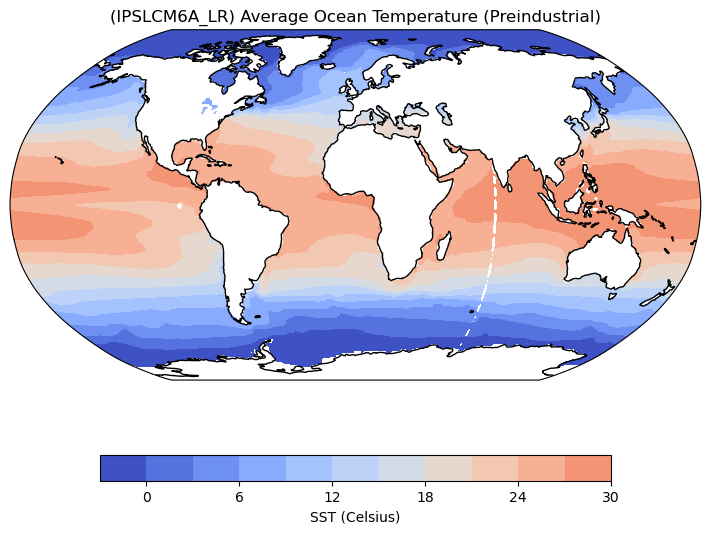

In [47]:
# Plotting
plot_projection(
    dr31_out.lon,
    dr31_out.lat,
    dr31_out['temp'][0, :, :],
    var=var,
    title="(IPSLCM6A_LR) Average Ocean Temperature (Preindustrial)"
)

## #32 GISS Annual Mean Preindustrial Control Upper Ocean Temperature (No Custom Masking)

In [51]:
# Specify the file path and name of the dataset
path32 = '/glade/campaign/univ/ugmu0029/PlioMIP2/GISS/thetao/thetaoControl/'
fname32 = 'thetao_Omon_GISS-E2-1-G_piControl_r1i1p1f3_gn_290001-291912.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds32 = xr.open_dataset(path32 + fname32)

# Calculate the mean along the 'time' dimension
ds32 = ds32.mean('time')

# Rename the 'thetao' variable to 'temp'
ds32 = ds32.rename({'thetao': 'temp'})

# Squeeze the dimensions to remove any size-1 dimensions
ds32 = ds32.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds32_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds32, ds32_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr32_out = regridder(ds32['temp']).to_dataset(name='temp')

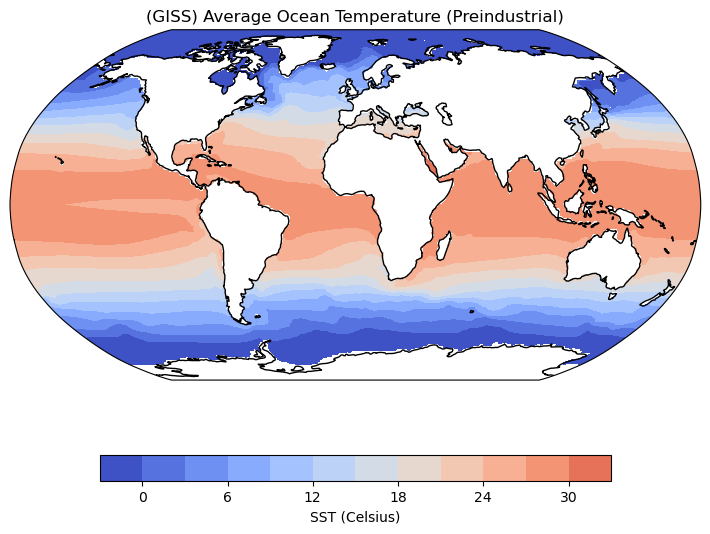

In [52]:
# Plotting
plot_projection(
    dr32_out.lon,
    dr32_out.lat,
    dr32_out['temp'][0, :, :],
    var=var,
    title="(GISS) Average Ocean Temperature (Preindustrial)"
)

## #33 NorESM-F Annual Mean Preindustrial Control Upper Ocean Temperature (No files)

In [14]:
# Specify the file path and name of the dataset
path33 = '/glade/campaign/univ/ugmu0029/PlioMIP2/NorESM1-F/'
fname33 = 'E280_NorESM1-F_thetao.nc'

# Open the dataset using xarray, with decode_times=False to avoid decoding times
ds33 = xr.open_dataset(path33 + fname33, decode_times=False)

ds33 = ds33.rename({'thetao':'TEMP', 'depth':'lev'})
ds33 = ds33.squeeze()

# Create a new dataset for regridding with desired lat and lon coordinates
ds33_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})
# Create a regridder using nearest_s2d method
regridder = xe.Regridder(ds33, ds33_out, 'nearest_s2d')

# Perform regridding on the temp variable and convert to dataset
dr33_out = regridder(ds33['TEMP']).to_dataset(name='TEMP')

file = 'NorESM-F_pi.nc'

dr33_out.to_netcdf(output_file_path + file)
dr33_out 

Overwrite existing file: nearest_s2d_180x360_181x360.nc 
 You can set reuse_weights=True to save computing time.


<xarray.Dataset>
Dimensions:  (lat: 181, lev: 70, lon: 360)
Coordinates:
    time     float64 3.468e+05
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 6e+03 6.25e+03 6.5e+03 6.75e+03
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    TEMP     (lev, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan